# Импорт библиотек и загрузка данных

In [48]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, f_oneway

In [49]:
hotels = pd.read_csv('data/hotels.csv')
hotels.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


Первоначальная версия датасета содержит 17 полей со следующей информацией:

* hotel_address — адрес отеля;
* review_date — дата, когда рецензент разместил соответствующий отзыв;
* average_score — средний балл отеля, рассчитанный на основе последнего комментария за последний год;
* hotel_name — название отеля;
* reviewer_nationality — страна рецензента;
* negative_review — отрицательный отзыв, который рецензент дал отелю;
* review_total_negative_word_counts — общее количество слов в отрицательном отзыв;
* positive_review — положительный отзыв, который рецензент дал отелю;
* review_total_positive_word_counts — общее количество слов в положительном отзыве.
* reviewer_score — оценка, которую рецензент поставил отелю на основе своего опыта;
* total_number_of_reviews_reviewer_has_given — количество отзывов, которые рецензенты дали в прошлом;
* total_number_of_reviews — общее количество действительных отзывов об отеле;
* tags — теги, которые рецензент дал отелю;
* days_since_review — количество дней между датой проверки и датой очистки;
* additional_number_of_scoring — есть также некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки.
* lat — географическая широта отеля;
* lng — географическая долгота отеля.

# 1. Исследование данных

In [50]:
hotels.describe()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,lat,lng
count,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000,386803.00000,386803.000000,384355.000000,384355.000000
mean,498.246536,8.397231,18.538988,2743.992042,17.776985,7.17725,8.396906,49.443522,2.823402
std,500.258012,0.547881,29.703369,2316.457018,21.726141,11.05442,1.636090,3.466936,4.579043
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.00000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.00000,7.500000,48.214662,-0.143649
50%,342.000000,8.400000,9.000000,2134.000000,11.000000,3.00000,8.800000,51.499981,-0.000250
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.00000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.00000,10.000000,52.400181,16.429233


In [51]:
hotels.describe(include='object')

,hotel_address,review_date,hotel_name,reviewer_nationality,negative_review,positive_review,tags,days_since_review
count,386803,386803,386803,386803,386803,386803,386803,386803
unique,1493,731,1492,225,248828,311737,47135,731
top,163 Marsh Wall Docklands Tower Hamlets London ...,8/2/2017,Britannia International Hotel Canary Wharf,United Kingdom,No Negative,No Positive,"[' Leisure trip ', ' Couple ', ' Double Room '...",1 days
freq,3587,1911,3587,184033,95907,26885,3853,1911


Категориальные признаки имеют много уникальных значений, перед кодированием их необходимо очистить и сгруппировать.
На этапе подготовки данных постараемся извлечь из них как можно больше полезной информации.
Из признака "hotel_address" можно извлечь страну и город расположения отеля.
Из "review_date" выделим месяц оставленного отзыва, чтобы оценить, как на оценку влияет сезонность.
Для категоризации остальных признаков необходимо более подробно рассмотреть данные в разрезе.

array([[<Axes: title={'center': 'additional_number_of_scoring'}>,
        <Axes: title={'center': 'average_score'}>,
        <Axes: title={'center': 'review_total_negative_word_counts'}>],
       [<Axes: title={'center': 'total_number_of_reviews'}>,
        <Axes: title={'center': 'review_total_positive_word_counts'}>,
        <Axes: title={'center': 'total_number_of_reviews_reviewer_has_given'}>],
       [<Axes: title={'center': 'lat'}>, <Axes: title={'center': 'lng'}>,
        <Axes: >]], dtype=object)

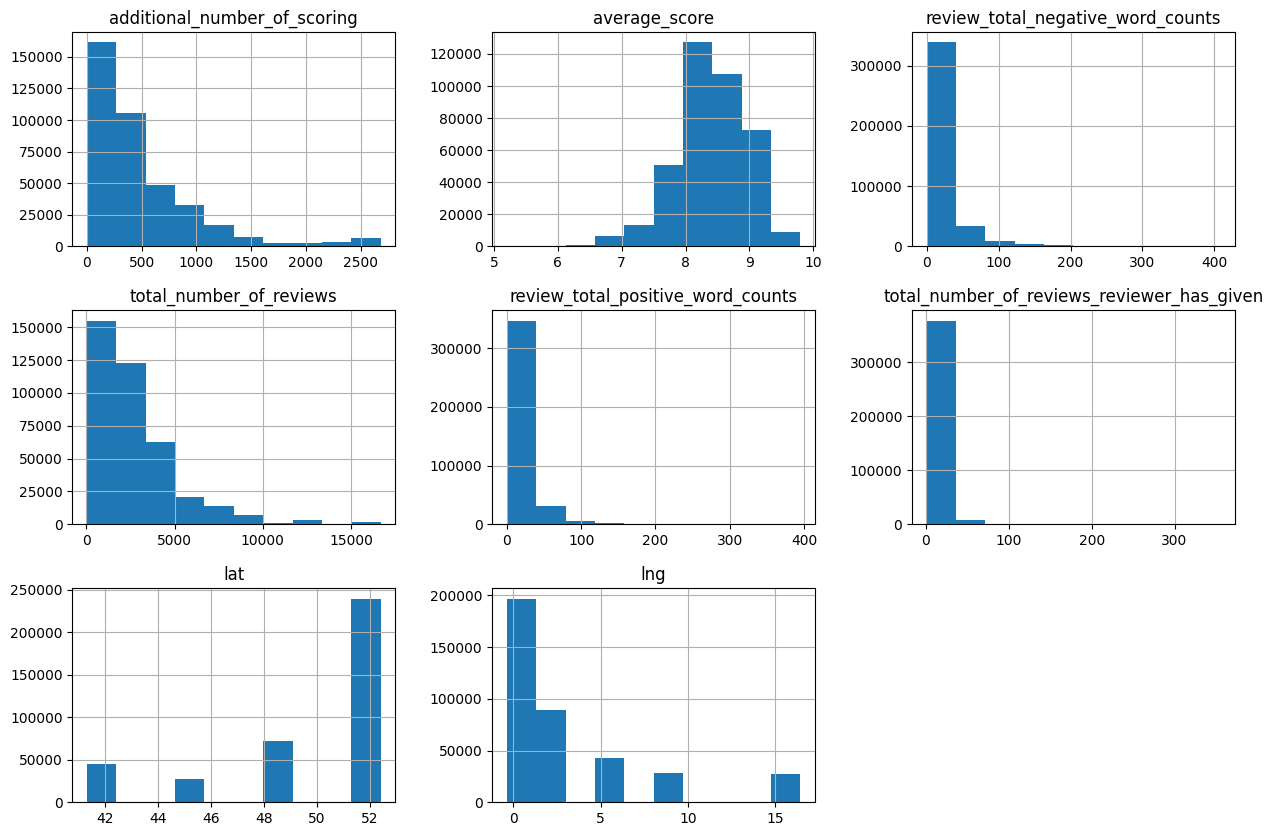

In [52]:
# оценим распределение числовых признаков
hotels.drop(columns=['reviewer_score'], axis=1).hist(figsize=(15, 10))

Практически все непрерывные признаки имеют распределение, отличное от нормального, возможно, за исключением "average_score", по нему необходимо будет провести тест на нормальность. Остальные признаки необходимо проанализировать на наличие выбросов и провести нормализацию.

# 2. Работа с признаками

2.1. Извлечения числовых признаков

In [53]:
# категориальные признаки
cat_cols = [s for s in hotels.columns if hotels[s].dtypes == 'object']
# непрерывные признаки
num_cols = [s for s in hotels.columns if hotels[s].dtypes != 'object']
display('Категориальные признаки:', cat_cols)
display('Непрерывные признаки:', num_cols)

'Категориальные признаки:'

['hotel_address',
 'review_date',
 'hotel_name',
 'reviewer_nationality',
 'negative_review',
 'positive_review',
 'tags',
 'days_since_review']

'Непрерывные признаки:'

['additional_number_of_scoring',
 'average_score',
 'review_total_negative_word_counts',
 'total_number_of_reviews',
 'review_total_positive_word_counts',
 'total_number_of_reviews_reviewer_has_given',
 'reviewer_score',
 'lat',
 'lng']

In [54]:
# Выбираем только строковые колонки
string_columns = hotels.select_dtypes(include=['object']).columns
print("Строковые колонки:", list(string_columns))

# Посмотрим на уникальные значения в каждой строковой колонке
for column in string_columns:
    print(f"\n--- {column} ---")
    print("Уникальных значений:", hotels[column].nunique())
    print("Примеры значений:")
    print(hotels[column].value_counts().head())

Строковые колонки: ['hotel_address', 'review_date', 'hotel_name', 'reviewer_nationality', 'negative_review', 'positive_review', 'tags', 'days_since_review']

--- hotel_address ---
Уникальных значений: 1493
Примеры значений:
hotel_address
163 Marsh Wall Docklands Tower Hamlets London E14 9SJ United Kingdom              3587
372 Strand Westminster Borough London WC2R 0JJ United Kingdom                     3206
Westminster Bridge Road Lambeth London SE1 7UT United Kingdom                     3095
Scarsdale Place Kensington Kensington and Chelsea London W8 5SY United Kingdom    2688
7 Pepys Street City of London London EC3N 4AF United Kingdom                      2379
Name: count, dtype: int64

--- review_date ---
Уникальных значений: 731
Примеры значений:
review_date
8/2/2017     1911
9/15/2016    1738
4/5/2017     1702
8/30/2016    1462
2/16/2016    1451
Name: count, dtype: int64

--- hotel_name ---
Уникальных значений: 1492
Примеры значений:
hotel_name
Britannia International Hotel Cana

Строковые колонки:
* hotel_address
* review_date
* hotel_name
* reviewer_nationality
* negative_review
* positive_review
* tags
* days_since_review

Колонка review_date представляет собой дату.

2.2. Извлечение признаков из даты

In [55]:
# Преобразуем в datetime
hotels['review_date'] = pd.to_datetime(hotels['review_date'])

# Когда был оставлен самый свежий отзыв
freshest_review = hotels['review_date'].max()
print("Cамый свежий отзыв:", freshest_review)

# Когда был оставлен самый первый отзыв
first_eview = hotels['review_date'].min()
print("Самый первый отзыв:", first_eview)

# Извлекаем числовые признаки
hotels['review_year'] = hotels['review_date'].dt.year
hotels['review_month'] = hotels['review_date'].dt.month
hotels['review_day'] = hotels['review_date'].dt.day
hotels['review_dayofweek'] = hotels['review_date'].dt.dayofweek # Понедельник=0, Воскресенье=6

# Удалим исходный столбец даты, так как мы его разбили на числа
hotels.drop('review_date', axis=1, inplace=True)

Cамый свежий отзыв: 2017-08-03 00:00:00
Самый первый отзыв: 2015-08-04 00:00:00


2.3. Обработка столбца с тегами

In [56]:
# Разбиваем все теги на отдельные и создаем плоский список
all_tags = hotels['tags'].str.strip("[]").str.replace("'", "").str.split(", ").explode().str.strip()

# Удаляем пустые строки и считаем уникальные
unique_tags_count = all_tags[all_tags != ''].nunique()
print(f"Количество уникальных тегов: {unique_tags_count}")

Количество уникальных тегов: 2368


In [57]:
# Создаем список всех отдельных тегов
all_tags = []
for tag_list in hotels['tags']:
    # Очищаем строку от лишних символов и разбиваем на отдельные теги
    cleaned_tags = tag_list.strip().replace('[', '').replace(']', '').replace("'", "").split(', ')
    # Убираем лишние пробелы и добавляем в общий список
    cleaned_tags = [tag.strip() for tag in cleaned_tags if tag.strip()]
    all_tags.extend(cleaned_tags)

# Считаем частоту каждого тега
tag_counts = pd.Series(all_tags).value_counts()

# Находим самый частый тег
most_common_tag = tag_counts.index[0]
most_common_count = tag_counts.iloc[0]

print(f"Самый частый тег: '{most_common_tag}'")
print(f"Количество отзывов с этим тегом: {most_common_count}")

Самый частый тег: 'Leisure trip'
Количество отзывов с этим тегом: 313593


In [58]:
# Фильтруем теги, связанные с продолжительностью пребывания
stay_tags = [tag for tag in all_tags if 'night' in tag.lower() or 'ноч' in tag.lower()]

# Считаем частоту тегов с продолжительностью пребывания
stay_tag_counts = pd.Series(stay_tags).value_counts()

print("Теги с продолжительностью пребывания:")
for tag, count in stay_tag_counts.items():
    print(f"'{tag}': {count} отзывов")

Теги с продолжительностью пребывания:
'Stayed 1 night': 145373 отзывов
'Stayed 2 nights': 100263 отзывов
'Stayed 3 nights': 72000 отзывов
'Stayed 4 nights': 35748 отзывов
'Stayed 5 nights': 15611 отзывов
'Stayed 6 nights': 7399 отзывов
'Stayed 7 nights': 5549 отзывов
'Stayed 8 nights': 1910 отзывов
'Stayed 9 nights': 966 отзывов
'Stayed 10 nights': 663 отзывов
'Stayed 11 nights': 306 отзывов
'Stayed 12 nights': 217 отзывов
'Stayed 14 nights': 184 отзывов
'Stayed 13 nights': 174 отзывов
'Stayed 15 nights': 87 отзывов
'Stayed 16 nights': 38 отзывов
'Stayed 17 nights': 27 отзывов
'Stayed 18 nights': 24 отзывов
'Stayed 19 nights': 23 отзывов
'Stayed 21 nights': 19 отзывов
'Stayed 20 nights': 17 отзывов
'Stayed 27 nights': 10 отзывов
'Stayed 30 nights': 10 отзывов
'King Room with Knightsbridge View': 8 отзывов
'Stayed 22 nights': 8 отзывов
'Stayed 28 nights': 7 отзывов
'Special Offer Double Room 3 nights minimum': 6 отзывов
'Stayed 23 nights': 6 отзывов
'Stayed 26 nights': 6 отзывов
'Stayed

In [59]:
# Пример: [' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 1 night ']
# Создадим бинарные признаки для самых популярных тегов

# Сначала получим список всех уникальных тегов
all_tags = []
for tag_list in hotels['tags']:
    # Очищаем строку от лишних символов и разбиваем на отдельные теги
    cleaned_tags = tag_list.strip().replace('[', '').replace(']', '').replace("'", "").split(', ')
    # Убираем лишние пробелы и добавляем в общий список
    cleaned_tags = [tag.strip() for tag in cleaned_tags if tag.strip()]
    all_tags.extend(cleaned_tags)

# Считаем частоту тегов
unique_tags = pd.Series(all_tags).value_counts()

# Возьмем топ-10 самых частых тегов
top_tags = unique_tags.head(10).index

# Создадим новые столбцы для каждого топового тега
for tag in top_tags:
    # Создаем безопасное имя для столбца
    col_name = 'tag_' + tag.replace(' ', '_').replace("'", "").replace("-", "_")
    # Проверяем, содержится ли тег в строке
    hotels[col_name] = hotels['tags'].apply(
        lambda x: 1 if tag in str(x) else 0
    )

# Удалим исходный столбец tags
hotels.drop('tags', axis=1, inplace=True)

2.4. Обработка "days_since_review"

In [60]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели
# Х — данные с информацией об отелях, у — целевая переменная (рейтинги отелей)
X = hotels.drop(['reviewer_score'], axis = 1)
y = hotels['reviewer_score']

# Простая очистка - оставляем только числовые столбцы
X_numeric = X.select_dtypes(include=[np.number])
print(f"Исходно столбцов: {X.shape[1]}, после очистки: {X_numeric.shape[1]}")

# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" — для тестирования.
# Для тестирования мы будем использовать 25 % от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.25, random_state=42)

Исходно столбцов: 28, после очистки: 22


In [61]:
# 1.4. Обработка "days_since_review"
# Извлекаем число из строки "X days" или "X day"
hotels['days_since_review_num'] = hotels['days_since_review'].str.extract('(\d+)').astype(float)

# Удалим исходный столбец
hotels.drop('days_since_review', axis=1, inplace=True)

2.5. Извлечение признаков из адреса

In [62]:
# Можно извлечь страну (часто это последнее слово в адресе)
hotels['hotel_country'] = hotels['hotel_address'].apply(lambda x: x.split()[-1])

# Удалим исходный длинный адрес
hotels.drop('hotel_address', axis=1, inplace=True)

2.6. Обработка координат (если они строки)

In [63]:
# Если координаты записаны как строки (например, "50.123, 8.456")
if hotels['lat'].dtype == 'object':
    hotels['lat'] = pd.to_numeric(hotels['lat'].str.replace(',', '.'), errors='coerce')
    hotels['lng'] = pd.to_numeric(hotels['lng'].str.replace(',', '.'), errors='coerce')

2.7. Кодирование категориальных признаков

Для столбцов с небольшим числом уникальных категорий (например, hotel_country, reviewer_nationality) лучше всего использовать Frequency Encoding.

In [64]:
# Для hotel_country
country_freq = hotels['hotel_country'].value_counts().to_dict()
hotels['hotel_country_encoded'] = hotels['hotel_country'].map(country_freq)

# Удалим исходные категориальные столбцы
hotels.drop(['hotel_country', 'reviewer_nationality'], axis=1, inplace=True)

2.8. Название отеля

In [65]:
# Просто удалим, так как это самый простой вариант
hotels.drop('hotel_name', axis=1, inplace=True)

# 3. Проверка значимости признаков

Теперь, когда у нас почти все признаки числовые, можно провести анализ.

Допустим, наша целевая переменная — reviewer_score (рейтинг отеля от рецензента).

Корреляция признаков с целевой переменной:
reviewer_score                        1.000000
review_total_negative_word_counts     0.383487
average_score                         0.364540
review_total_positive_word_counts     0.220152
tag_Leisure_trip                      0.118221
tag_Business_trip                     0.113646
tag_Solo_traveler                     0.083518
total_number_of_reviews               0.073587
tag_Couple                            0.070054
additional_number_of_scoring          0.062161
hotel_country_encoded                 0.043742
lat                                   0.036984
lng                                   0.034829
review_month                          0.032687
tag_Family_with_young_children        0.020420
tag_Submitted_from_a_mobile_device    0.014919
tag_Group                             0.011812
review_year                           0.011245
tag_Stayed_3_nights                   0.010651
review_dayofweek                      0.008924
Name: reviewer_sc

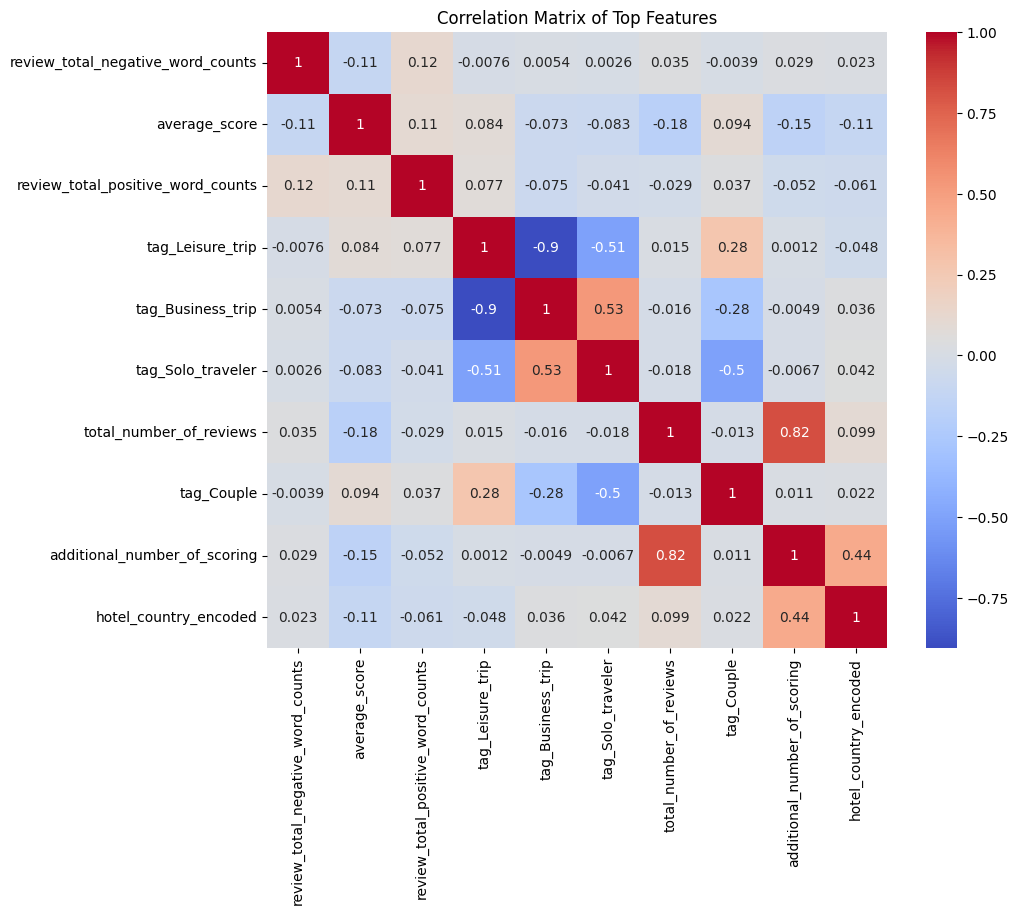


Лучшие признаки по корреляции: ['review_total_negative_word_counts', 'average_score', 'review_total_positive_word_counts', 'tag_Leisure_trip', 'tag_Business_trip', 'tag_Solo_traveler', 'total_number_of_reviews', 'tag_Couple', 'additional_number_of_scoring', 'hotel_country_encoded']


In [66]:
# Самый простой и надежный подход
analysis_df = hotels.dropna().copy()

# 1. Просто посмотрим на корреляции всех числовых признаков
numeric_df = analysis_df.select_dtypes(include=[np.number])
correlations = numeric_df.corr()['reviewer_score'].abs().sort_values(ascending=False)

print("Корреляция признаков с целевой переменной:")
print(correlations.head(20))

# 2. Визуализация (опционально)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
top_features = correlations.head(11).index[1:]  # Исключаем сам reviewer_score
sns.heatmap(numeric_df[top_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Top Features')
plt.show()

print(f"\nЛучшие признаки по корреляции: {list(top_features)}")

In [67]:
# Убедимся, что в данных нет пропусков перед анализом
hotels = hotels.dropna()

# переопределить target после обработки данных!
target = hotels['reviewer_score']

####### ANOVA для непрерывных признаков #######
continuous_features = ['days_since_review_num', 'lat', 'lng', 'additional_number_of_scoring']

print("ANOVA Results (Continuous features vs reviewer_score):")
for feature in continuous_features:
    mask_high = hotels[feature] > hotels[feature].median()
    mask_low = hotels[feature] <= hotels[feature].median()

    high_score = target[mask_high]
    low_score = target[mask_low]

    # Дополнительная проверка на случай, если все значения в одной группе
    if len(high_score) > 0 and len(low_score) > 0:
        f_stat, p_value = f_oneway(high_score, low_score)
        print(f"{feature}: F-statistic={f_stat:.4f}, p-value={p_value:.4f}")
    else:
        print(f"{feature}: Cannot perform ANOVA - one group is empty")

####### Тест Хи-квадрат для категориальных признаков #######
target_binary = pd.qcut(target, q=2, labels=['Low', 'High'])

print("\nChi-Square Results (Categorical features vs reviewer_score):")
categorical_features = ['tag_Leisure_trip', 'tag_Solo_traveler', 'hotel_country_encoded']

for feature in categorical_features:
    contingency_table = pd.crosstab(hotels[feature], target_binary)

    # Проверяем, что таблица не вырождена
    if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        print(f"{feature}: Chi2={chi2:.4f}, p-value={p_value:.4f}")
    else:
        print(f"{feature}: Cannot perform Chi-square - contingency table is degenerate")

ANOVA Results (Continuous features vs reviewer_score):
days_since_review_num: F-statistic=26.3364, p-value=0.0000
lat: F-statistic=150.1513, p-value=0.0000
lng: F-statistic=721.3292, p-value=0.0000
additional_number_of_scoring: F-statistic=745.0098, p-value=0.0000

Chi-Square Results (Categorical features vs reviewer_score):
tag_Leisure_trip: Chi2=3614.2567, p-value=0.0000
tag_Solo_traveler: Chi2=2175.8452, p-value=0.0000
hotel_country_encoded: Chi2=665.1098, p-value=0.0000


Итог:

Разобрал даты на составляющие (год, месяц, день, день недели).

Извлек числа из строк вида "X days".

Разбил составные строки (теги) на бинарные признаки.

Извлек информацию из адреса (страна).

Преобразовал "псевдочисла" (координаты) в настоящие числа.

Закодировал категории с помощью Frequency Encoding.

Удалил бесполезные для моделирования столбцы (hotel_name).

Проверил значимость получившихся признаков с помощью ANOVA и Хи-квадрат.

Теперь DataFrame hotels состоит практически полностью из числовых столбцов и готов для передачи в модели машинного обучения.



# 4. Разделение набора данных

In [68]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели
# Х — данные с информацией об отелях, у — целевая переменная (рейтинги отелей)
X = hotels.drop(['reviewer_score'], axis = 1)
y = hotels['reviewer_score']

# Простая очистка - оставляем только числовые столбцы
X_numeric = X.select_dtypes(include=[np.number])
print(f"Исходно столбцов: {X.shape[1]}, после очистки: {X_numeric.shape[1]}")

# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" — для тестирования.
# Для тестирования мы будем использовать 25 % от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.25, random_state=42)

Исходно столбцов: 26, после очистки: 24


# 5. Создание и обучение модели

In [69]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

# 6. Оценка качества модели

In [70]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test) и смотрим, насколько они отличаются
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений в отношении фактических.
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.13614174251298308
